# Domácí úkol
## Část 1. Číselná spirála

Vytvořte čtvercovou matici o lichém počtu řádků a sloupců, která bude obsahovat čísla od 1 do $n^2$ tak, aby 1 byla uprostřed matice a číselná řada postupně narůstala po spirále proti směru hodinových ručiček.
- udělejte to pomocí NumPy přiřazování sliců do pole
- výstup musí být stejný jako primitivní funkce `integer_spiral` níže
- vyplňujte matici po "krůzích" okolo středu 
  - každý kruh je tvořen 4 částmi (hrana bez jednoho rohu)
  - využijte možnosti přiřazování sliců do pole a indexace s krokem -1
  - použijte `np.arange` pro vytvoření řady čísel kterou budete ukládat do hrany
- také si pomožte okrajem z 0, který nakonec oříznete

**Výsledná funkce bude mít tedy pouze jednu smyčku ve které do pole vstoupíme pouze 4x (jednou za každou hranu).** 

**Na závěr porovnejte rychlost vaší funkce s `integer_spiral` níže pomocí `%timeit` a různých výsledných velikostí matic (např. 101, 1001, 10001).**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
def integer_spiral_numpy(n):
    if n % 2 == 0:
        raise ValueError("Číslo musí být liché (nepárné)!")
        
    A = np.zeros((n + 2, n + 2), dtype=int)
    center = n // 2 + 1
    value = 1
    A[center, center] = value
    value += 1

    for radius in range(1, (n // 2) + 1 + 1):
        r = center - radius
        s = center + radius

        A[r:s, s] = np.arange(value, value + (s - r))
        value += (s - r)

        A[r, s:r:-1] = np.arange(value, value + (s - r))
        value += (s - r)

        A[r:s, r] = np.arange(value, value + (s - r))
        value += (s - r)

        A[s, r:s] = np.arange(value, value + (s - r))
        value += (s - r)

    return A[1:-1, 1:-1]

[[38 37 36 35 34 33 32]
 [39 18 17 16 15 14 27]
 [40 19  6  5  4 11 28]
 [41 20  7  1  3 12 29]
 [42 21  8  9  0 13 30]
 [43 22 23 24 25  0 31]
 [44 45 46 47 48 49  0]]


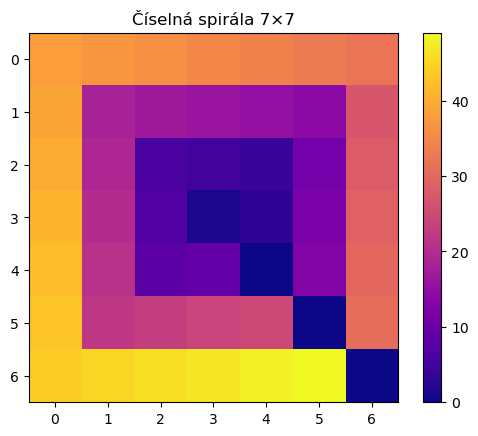

In [5]:
n = 7
spirala = integer_spiral_numpy(n)
print(spirala)

plt.imshow(spirala, cmap='plasma')
plt.colorbar()
plt.title(f"Číselná spirála {n}×{n}")
plt.show()

In [6]:
def integer_spiral(n):
    if n % 2 == 0:
        raise ValueError("Číslo musí být liché (nepárné)!")
        
    A = np.zeros((n + 2, n + 2))
    pos_row = n // 2 + 1
    pos_col = n // 2 + 1
    i = 1
    A[pos_row, pos_col] = i
    i += 1
    pos_col += 1

    while i <= n**2:
        A[pos_row, pos_col] = i
        i += 1
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1
        else:
            pos_row += 1

    return A[1:-1, 1:-1]


In [9]:
start = time.time()
integer_spiral(101)
end = time.time()
print("Čas integer_spiral:", end - start, "sekund")

start = time.time()
integer_spiral_numpy(101)
end = time.time()
print("Čas integer_spiral_numpy:", end - start, "sekund")

Čas integer_spiral: 0.022721529006958008 sekund
Čas integer_spiral_numpy: 0.0004420280456542969 sekund


## Část 2. Mandelbrotova množina
Vizualizujte Mandelbrotovu množinu na intervalu $[-2, 1] \times [-1.5, 1.5]$ pomocí `imshow`. Výsledek by měl vypadat jako následující obrázek.
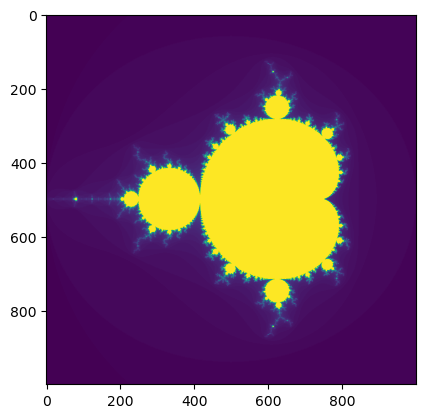

**Co je Mandelbrotova množina?**

Mandelbrotova množina je množina komplexních čísel $c$, pro které platí, že posloupnost $z_{i+1} = z_i^2 + c$ s $z_0 = 0$ konverguje (tj. $|z_i| < \infty$ pro všechna $n$).

**Co tedy udělat?**
- vytvořte matici $n\times n$ komplexních čísel $c$ na intervalu $[-2, 1] \times [-1.5, 1.5]$ (pomocí `np.mgrid` nebo `np.meshgrid`)
    - využite výhody vektorizace a toho, že numpy umí násobit komplexní čísla
- stanovit si počet iterací $k$, pro které budete testovat, zda posloupnost nedivergovala
    - to, že posloupnost diverguje, umíme pozorovat tak, že $|z_n| > 2$ pro nějaké $n$
- udělat $k$ iterací posloupnosti $z_{i+1} = z_i^2 + c$ a zjistit, kolikáté iteraci $k$ je se stalo, že $|z_i| < 2$
    - použijte pomocnou matici `divergence_matrix`, která bude mít stejný rozměr jako `c` a bude obsahovat počet iterací, kdy $|z_i| < 2$ pro každé $c$
- vytvořte obrázek pomocí `imshow` z `divergence_matrix`

In [10]:
def mandelbrot_set(x_min=-2, x_max=1, y_min=-1.5, y_max=1.5, n=1000, k=100):
    x = np.linspace(x_min, x_max, n)
    y = np.linspace(y_min, y_max, n)
    X, Y = np.meshgrid(x, y)
    C = X + 1j * Y

    Z = np.zeros_like(C, dtype=complex)
    divergence_matrix = np.zeros(C.shape, dtype=int)

    for i in range(k):
        mask = np.abs(Z) < 2
        Z[mask] = Z[mask] ** 2 + C[mask]
        divergence_matrix[mask & (np.abs(Z) >= 2)] = i

    return divergence_matrix

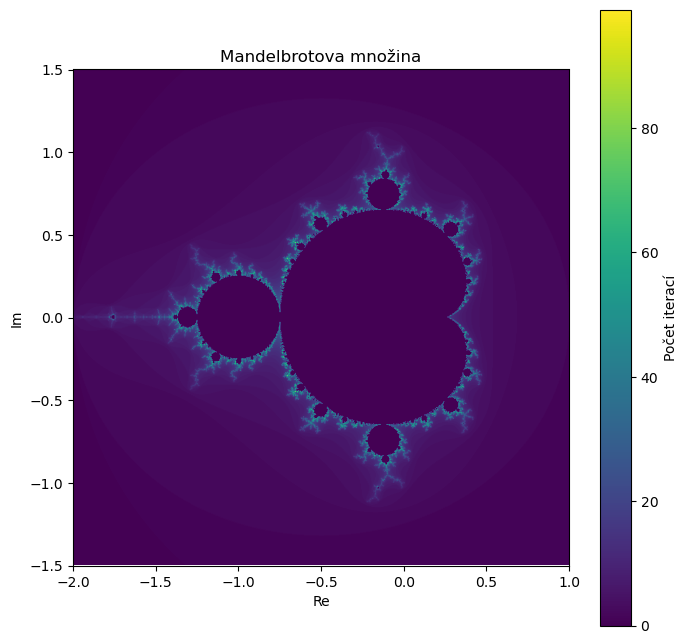

In [11]:
n = 1000
k = 100
divergence_matrix = mandelbrot_set(n=n, k=k)

plt.figure(figsize=(8, 8))
plt.imshow(divergence_matrix, cmap='viridis', origin='lower', extent=[-2, 1, -1.5, 1.5])
plt.title("Mandelbrotova množina")
plt.xlabel("Re")
plt.ylabel("Im")
plt.colorbar(label="Počet iterací")
plt.show()

# Bonus
1. Vykreslete také Juliovu množinu (viz. https://en.wikipedia.org/wiki/Julia_set)
2. Použijte váš kód pro číselnou spirálu a vytvořte obrázek prvočíselné spirály (viz. https://en.wikipedia.org/wiki/Ulam_spiral). Stačí vytvořit matici kde 

In [12]:
def julia_set(x_min=-1.5, x_max=1.5, y_min=-1.5, y_max=1.5, n=1000, k=100, c=-0.8 + 0.156j):
    x = np.linspace(x_min, x_max, n)
    y = np.linspace(y_min, y_max, n)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y

    divergence_matrix = np.zeros(Z.shape, dtype=int)

    for i in range(k):
        mask = np.abs(Z) < 2
        Z[mask] = Z[mask]**2 + c
        divergence_matrix[mask & (np.abs(Z) >= 2)] = i

    return divergence_matrix


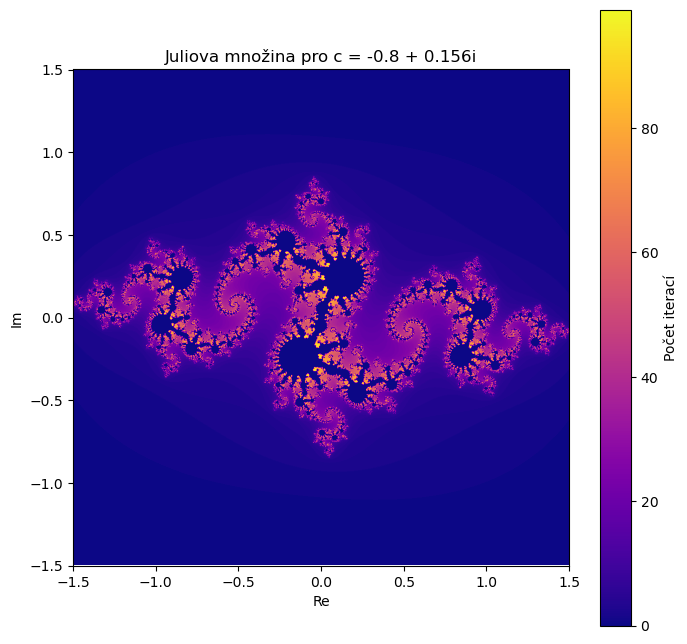

In [13]:
julia = julia_set(n=1000, k=100, c=-0.8 + 0.156j)

plt.figure(figsize=(8, 8))
plt.imshow(julia, cmap='plasma', origin='lower', extent=[-1.5, 1.5, -1.5, 1.5])
plt.title("Juliova množina pro c = -0.8 + 0.156i")
plt.xlabel("Re")
plt.ylabel("Im")
plt.colorbar(label="Počet iterací")
plt.show()